# The Exploratory Data Analysis is performed on the following datasets

1. Red Wine Data

2. Student Perfomance Data

3. Forest Fire Data

## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [ ]:
# lets first start with basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount the drive to easily access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
wine_data = pd.read_csv("/content/drive/MyDrive/EDA/winequality-red.csv")
wine_data.shape

(1599, 12)

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# summary of the dataset - tells us the basic details
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# lets see the statistic information of this data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# lets see the columns of this data
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# lets see the quality column - there are 6 unique values
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# check for missing values  - # there are no missing values we can see
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# check for duplicate records - we can see there are 240 duplicates
wine_data[wine_data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
# lets drop the duplicates
wine_data.drop_duplicates(inplace=True)
wine_data.shape

(1359, 12)

In [ ]:
# now lets see the correlation
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

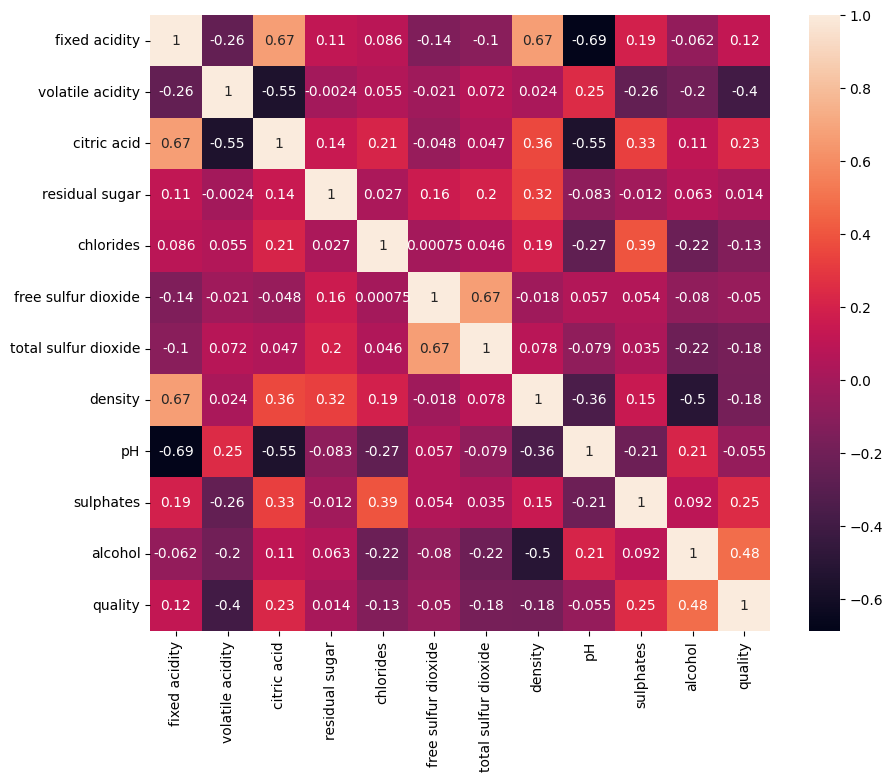

In [ ]:
# lets visualize the correlation plot -  this is the pearsons correlation
plt.figure(figsize = (10,8)) # lets adjust the figure to see the values of correlation well
# plot
sns.heatmap(wine_data.corr(), annot = True)

Insights

* The correlation plot is an essential step as it shows the relation between two features.

* If the correlation is high, we can remove one feature as this will lead to better modelling results.

In [ ]:
# lets see some more visualization

# lets see the counts of the y variable -  this shows that the data is imbalanced as categories 5,6,7 have more data points then 4,8,3
wine_data.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<Axes: xlabel='Wine quality', ylabel='Count'>

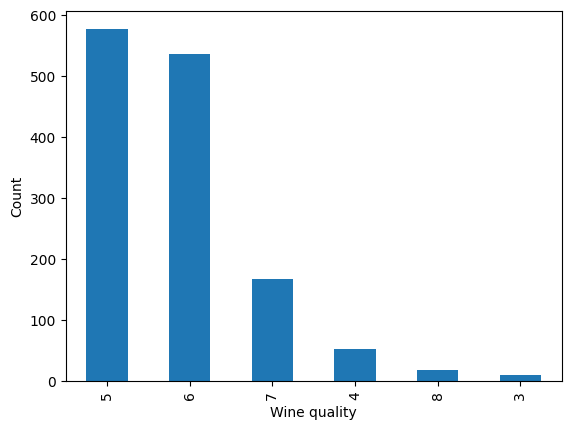

In [ ]:
# lets plot a bar chart for the quality to see the distribution visually -  this also shows the imbalance in our data
wine_data.quality.value_counts().plot(kind = 'bar', xlabel = 'Wine quality', ylabel = 'Count')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

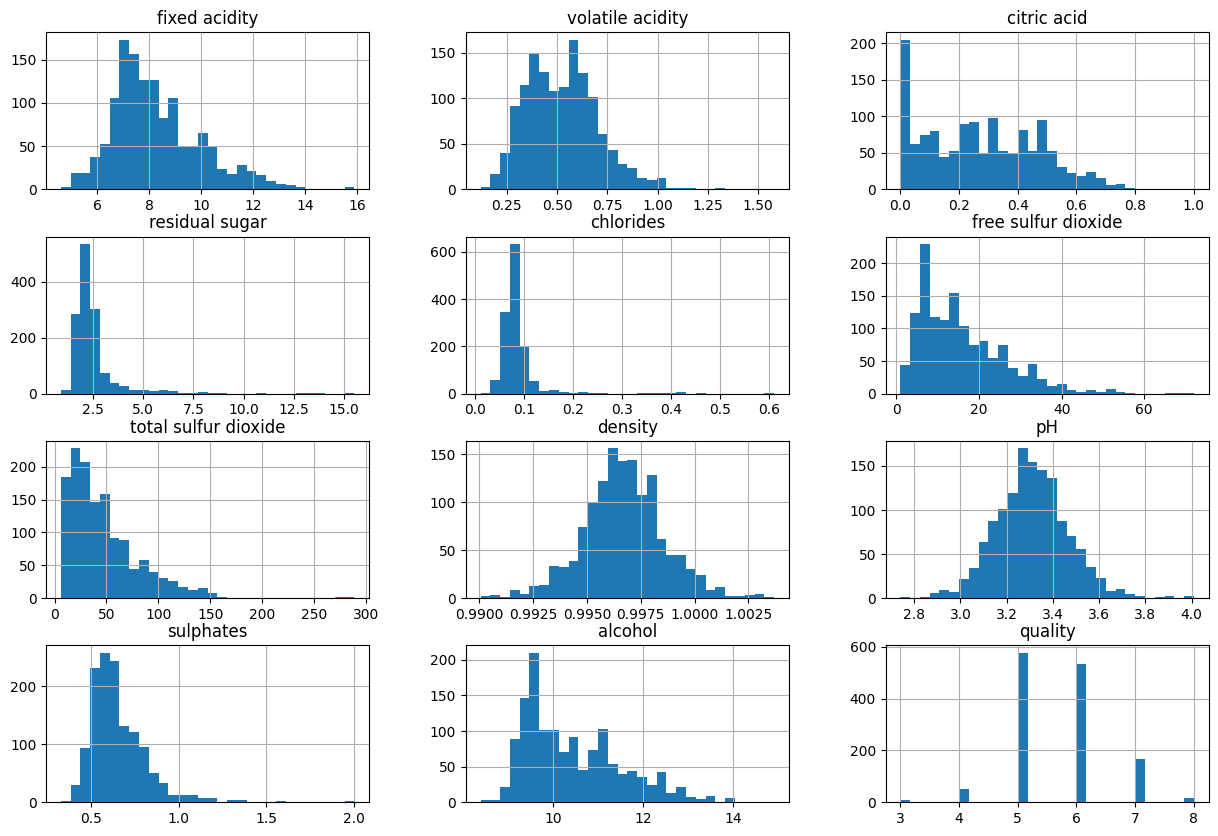

In [ ]:
# lets see the distribution for all the columns in the dataset
wine_data.hist(bins = 30, figsize=(15,10))

In [ ]:
# univariate, bivariate and multivariate analysis -  how one feature is correlated with other features
sns.pairplot(wine_data)

Output hidden; open in https://colab.research.google.com to view.

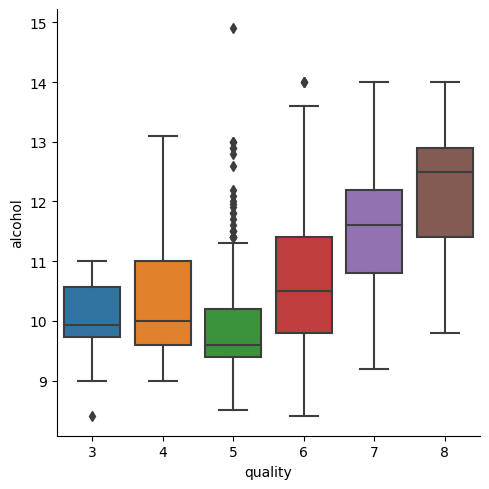

In [ ]:
# categorical plot
sns.catplot(x = 'quality', y = 'alcohol', data = wine_data, kind = 'box')

Insights -

* The outliers are be tracked using this boxplot

<Axes: xlabel='alcohol', ylabel='pH'>

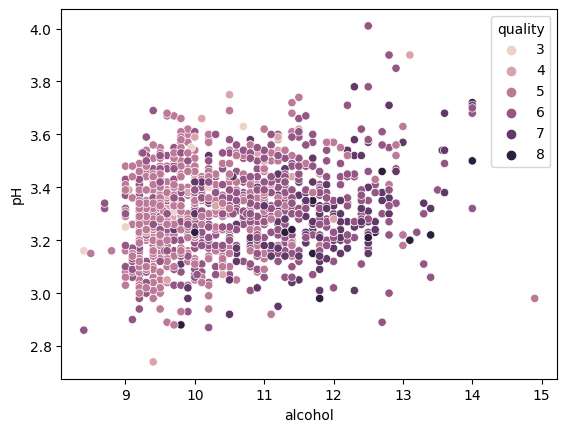

In [ ]:
# lets try creating a scatter plot of pH and alcohol wrt to the quality.
sns.scatterplot(x = 'alcohol', y = 'pH', hue = 'quality', data = wine_data)

Insights

* The scatter plot shows how well quality points are distributed wrt alcohol and pH level

The above gives us a good overview of the data. EDA helps to understand the data well which is necessary for creating models.

## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [ ]:
# lets first start with basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# read the data
stud_data = pd.read_csv("/content/drive/MyDrive/EDA/student.csv")
stud_data.shape

(1000, 8)

In [ ]:
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The important checks for the dataset includes -

1. check for missing values

2. check for duplicates

3. check if the datatype is correct for all the features

4. check number of unique values for each column

5. check for statistics

6. check various categories present in different categorical columns

In [ ]:
# check missing values - there are no null values present
stud_data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
# check duplicates -  there are no duplicate values
stud_data[stud_data.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [ ]:
stud_data.info()
# we can see the datatype of each column, for categorical features it is object and for scores that is numerical the datatype is int.
# Hence the datatypes are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# this tell us the unique values in each column, this is helpful for categorical features
stud_data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
# check for statistics of the data -  we get the mean, meadian, etc for our numerical faetures.
# we can see that all 3 mean values are very close to each other
# the std dev are also near by
# if u see for maths, min is 0, which means there are students with 0 marks as well.
# hence this description is very important for our dataset

stud_data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# now, lets sepearte the categorical and numerical columns for further analysis
categorical_columns = [feature for feature in stud_data.columns if stud_data[feature].dtype=='O']
numerical_columns = [feature for feature in stud_data.columns if stud_data[feature].dtype!='O']

In [ ]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [ ]:
numerical_columns

['math_score', 'reading_score', 'writing_score']

Now, we have 3 numerical columns that are the prediction columns.
Lets create two additional columns - aggreated_scores and average_scores.
These columns will then be compared with the categorical features and we will then see what effect they have on the new score columns.

In [ ]:
# aggreated column
stud_data['total_score'] = stud_data['math_score'] + stud_data['reading_score'] + stud_data['writing_score']
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [ ]:
# average column
stud_data['avg_score'] = (stud_data['math_score'] + stud_data['reading_score'] + stud_data['writing_score']) / 3
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


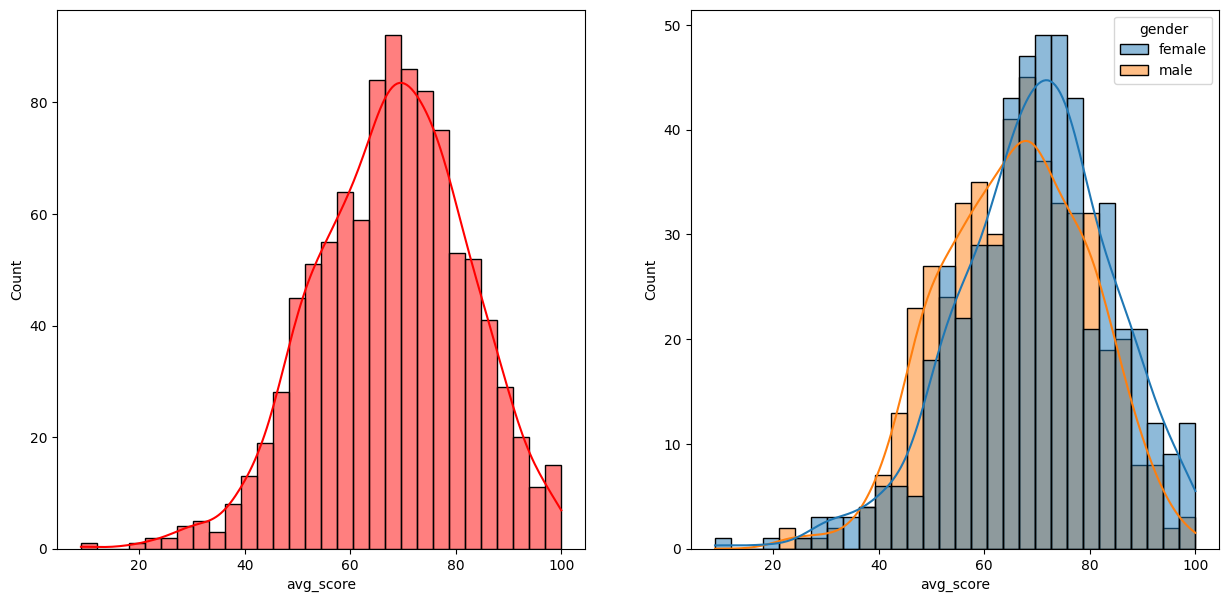

In [ ]:
# now lets get into visualization
fig,axis = plt.subplots(1,2,figsize=(15,7)) # 1,2 will give me 2 columns and 1 row
plt.subplot(121) # column 1, row 1
sns.histplot(data = stud_data, x = 'avg_score', bins = 30, kde=True, color='r') # wrt average

plt.subplot(122) # column 2 row 1
sns.histplot(data = stud_data, x = 'avg_score', bins = 30, kde=True, hue = 'gender') # wrt gender
plt.show()

Observations -

*   We can see that according to gender, female students score well compared to males.




<ipython-input-50-1e3a5523fd04>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-50-1e3a5523fd04>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-50-1e3a5523fd04>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


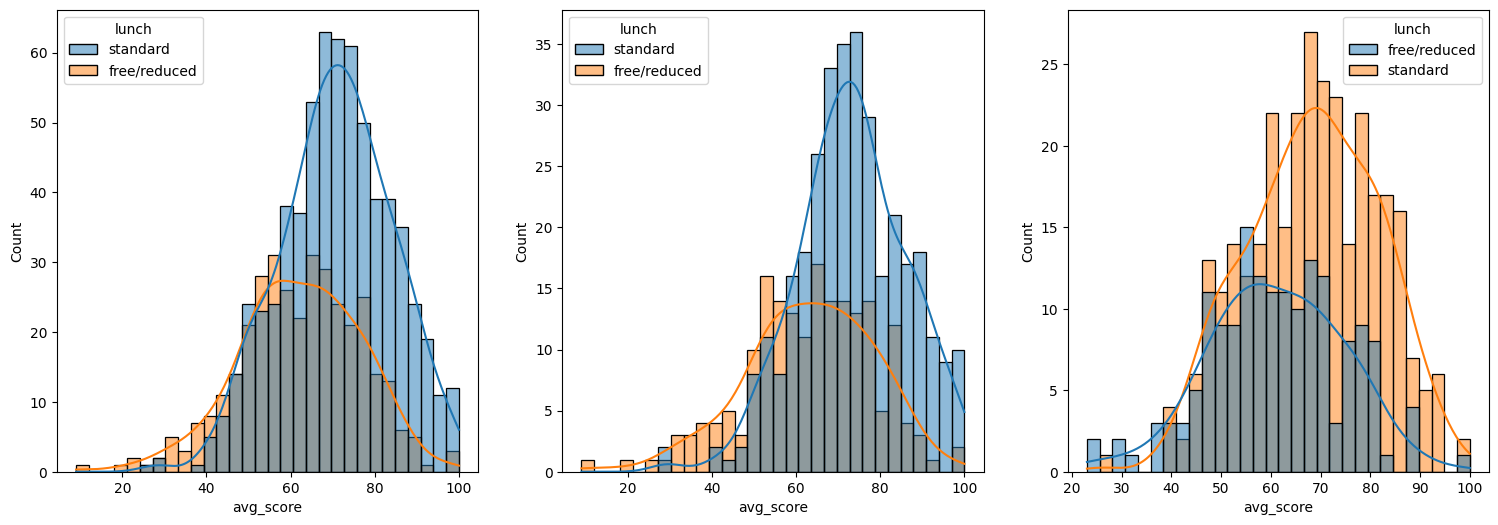

In [ ]:
# some more visualization
fig,axis = plt.subplots(1,3,figsize=(25, 6)) # 1 column, 3 rows
plt.subplot(141)
sns.histplot(data = stud_data, x = 'avg_score', bins = 30, kde=True, hue = 'lunch') # wrt lunch

plt.subplot(142)
sns.histplot(data = stud_data[stud_data.gender=='female'], x = 'avg_score', bins = 30, kde=True, hue = 'lunch') # wrt female and lunch
plt.subplot(143)
sns.histplot(data = stud_data[stud_data.gender=='male'], x = 'avg_score', bins = 30, kde=True, hue = 'lunch') # wrt male and lunch

plt.show()

Observations -

*   Standard lunch helps students perform well in exams
*   Standard lunch helps both males and females well in exams.



<ipython-input-51-75a81f1da42d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-51-75a81f1da42d>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-51-75a81f1da42d>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


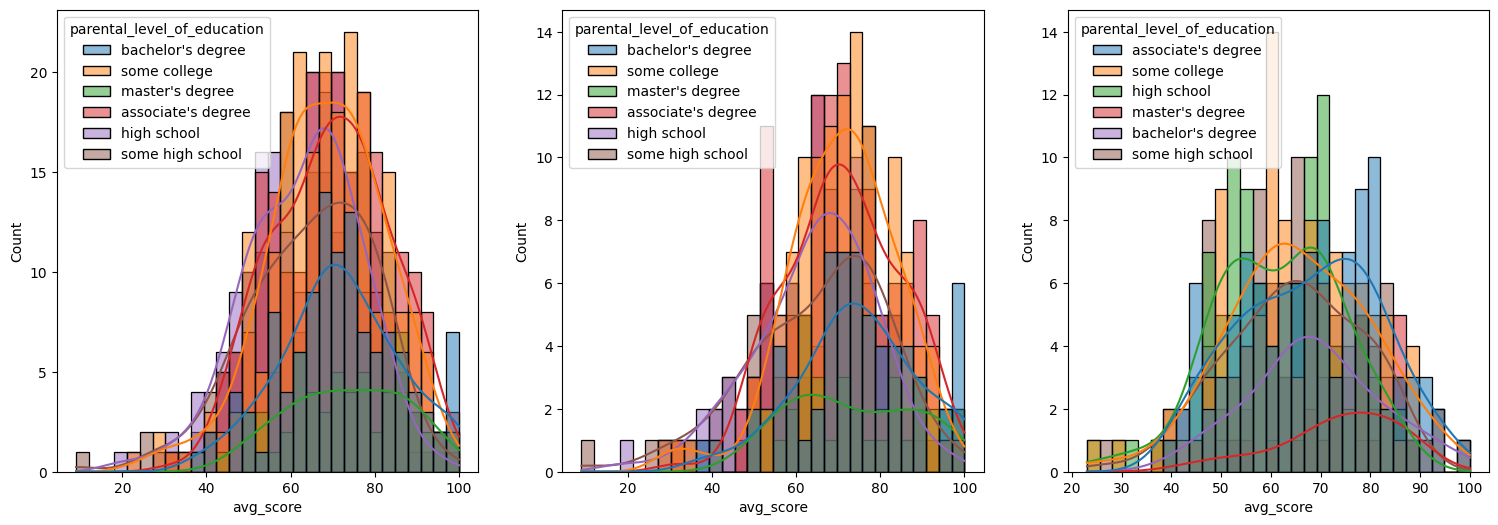

In [ ]:
# now with parental level of education
fig,axis = plt.subplots(1,3,figsize=(25, 6)) # 1 column, 3 rows
plt.subplot(141)
sns.histplot(data = stud_data, x = 'avg_score', bins = 30, kde=True, hue = 'parental_level_of_education') # wrt parental_level_of_education

plt.subplot(142)
sns.histplot(data = stud_data[stud_data.gender=='female'], x = 'avg_score', bins = 30, kde=True, hue = 'parental_level_of_education') # wrt female and parental_level_of_education

plt.subplot(143)
sns.histplot(data = stud_data[stud_data.gender=='male'], x = 'avg_score', bins = 30, kde=True, hue = 'parental_level_of_education') # wrt male and parental_level_of_education

plt.show()

Observations

*   plot 1 - shows the average score is almost same, parentenal eduaction doesnt really help them in scores.

*   plot 2 - There is no effect of parental eduaction on females students

*   plot 3 -  on the other hand, for male students we can see that, parents whose eduaction is assocaite's degree or a master's degree, male students tend to perform well.



<ipython-input-52-9a0e63a3dac7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-52-9a0e63a3dac7>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-52-9a0e63a3dac7>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


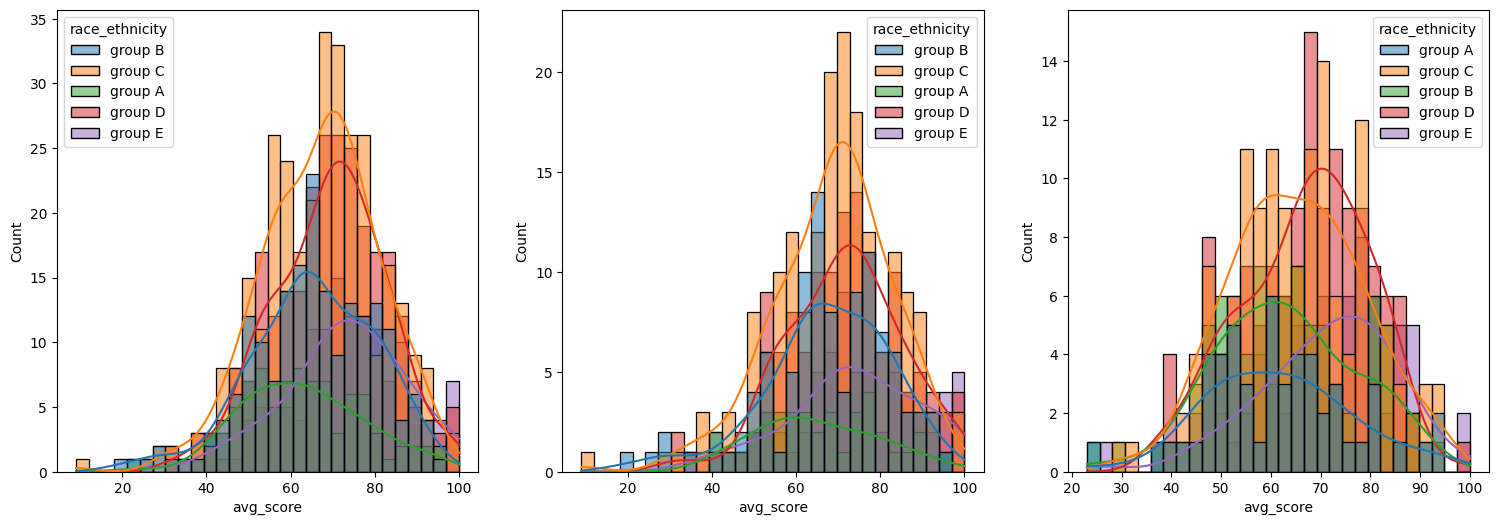

In [ ]:
# now with race_ethnicity
fig,axis = plt.subplots(1,3,figsize=(25, 6)) # 1 column, 3 rows
plt.subplot(141)
sns.histplot(data = stud_data, x = 'avg_score', bins = 30, kde=True, hue = 'race_ethnicity') # wrt race_ethnicity

plt.subplot(142)
sns.histplot(data = stud_data[stud_data.gender=='female'], x = 'avg_score', bins = 30, kde=True, hue = 'race_ethnicity') # wrt female and race_ethnicity

plt.subplot(143)
sns.histplot(data = stud_data[stud_data.gender=='male'], x = 'avg_score', bins = 30, kde=True, hue = 'race_ethnicity') # wrt male and race_ethnicity

plt.show()

Observations -

*   plot 1 - students of group A and B tend to perfom poorly in exams as they are right skewed and mean ranges on the lesser side compared to other race groups.

*   plot 2&3 - same insights, students tend to perform poorly in exams irrespective of their genders.




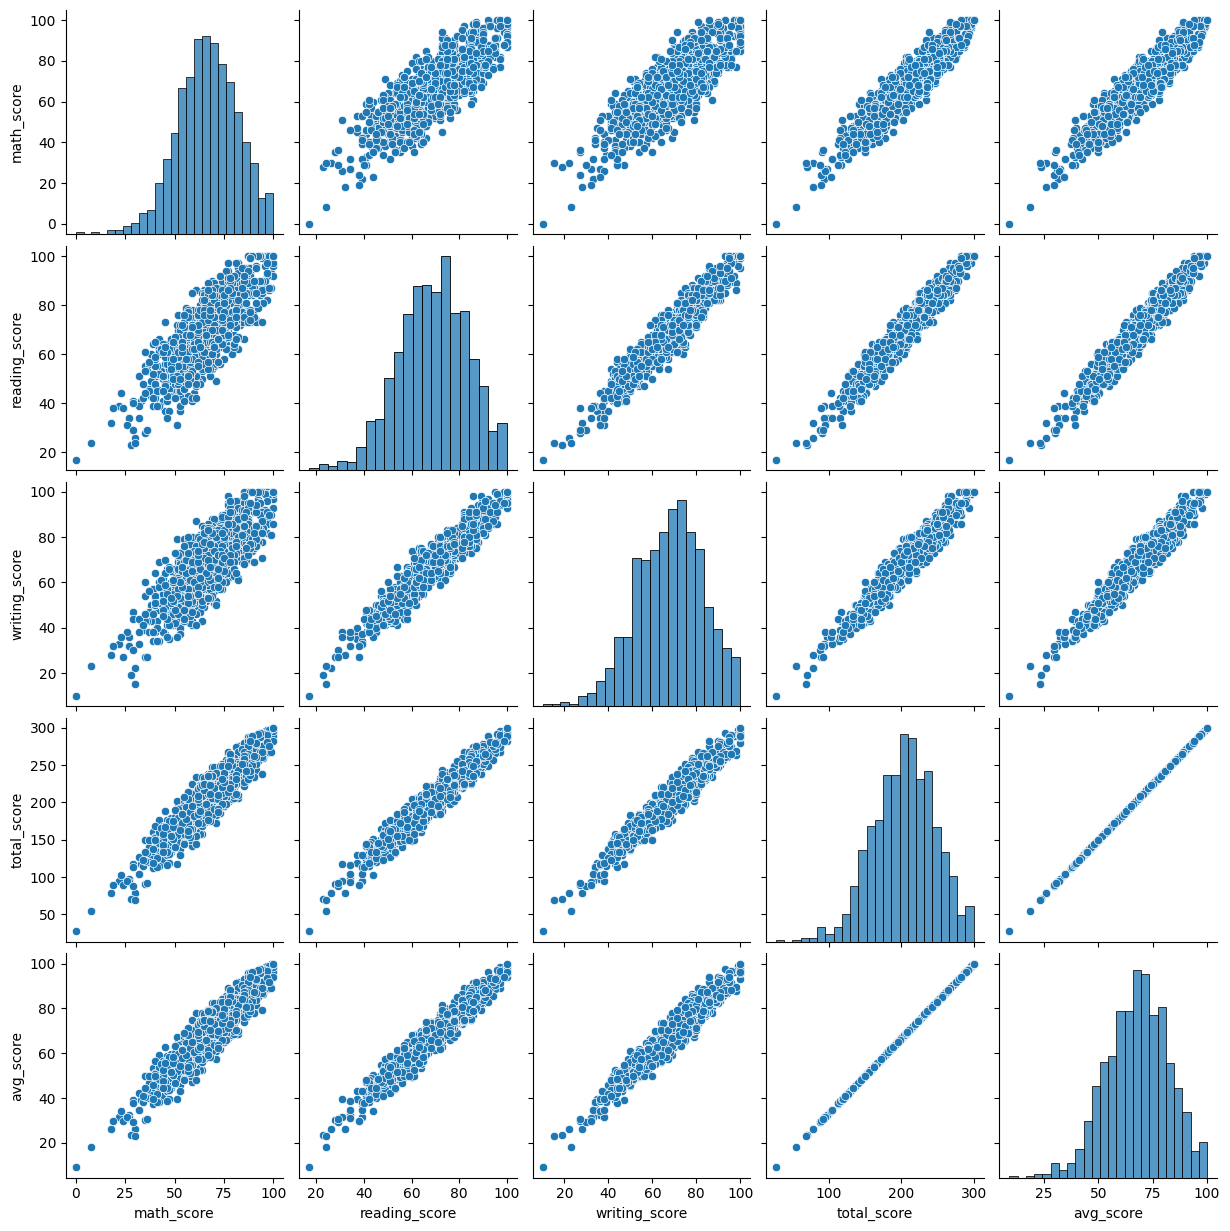

In [ ]:
sns.pairplot(stud_data)

<ipython-input-54-b43234a99a3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stud_data.corr(), annot = True)


<Axes: >

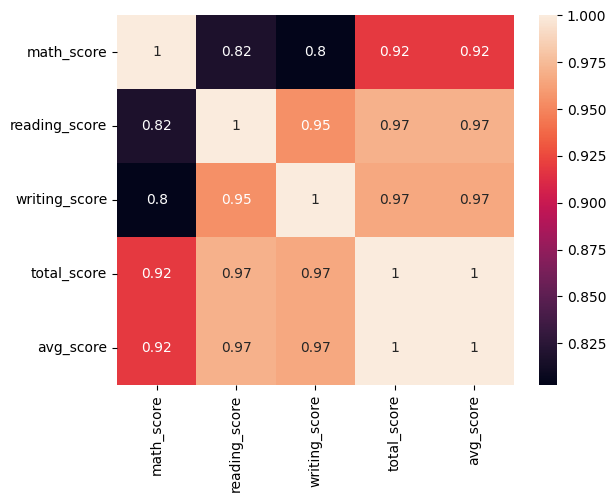

In [ ]:
sns.heatmap(stud_data.corr(), annot = True)

# we can see a very high correlation between the scores.

Observations

* The correlation plot shows how highly correlated the variables are.



# EDA with Algerian Forest Fires Dataset Project


## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps



## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index




## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.



# Lets start with cleaning the dataset first

In [ ]:
# lets first start with basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
fires_data = pd.read_csv("/content/drive/MyDrive/EDA/Algerian_forest_fires_dataset.csv", header = 1)
fires_data.shape

(246, 14)

In [ ]:
fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Now, with help of info() we can see that all the features have been identified as object. These can be converted to integer so that we can process on it.

# Data Cleaning

In [ ]:
# lets check for null values
fires_data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [ ]:
# Columns which has null values
fires_data[fires_data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Now looking at the dataset carefully, we understand that there are 2 datasets combined into one data.

The data is divided wrt the two regions

1 - Bejaia Region Dataset (1 - 121)

2 - Sidi-Bel Abbes Region Dataset (122 - 246)

We will now add the "region" as a column

In [ ]:
fires_data.loc[:122, 'Region']=1
fires_data.loc[122:, 'Region']=2
fires_data[['Region']] = fires_data[['Region']].astype(int)

In [ ]:
fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [ ]:
fires_data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

Now, the null values are very less, so we can drop them. If the values were more than 30% then we could use data imputation

In [ ]:
fires_data.dropna(inplace=True)

In [ ]:
fires_data.shape

(244, 15)

Now lets look into the datatype of all the faeture columns

In [ ]:
fires_data.iloc[[122]] # here the day column has the string value that makes the column datatype to be object, hence lets drop it

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [ ]:
fires_data= fires_data.drop(123).reset_index(drop=True)

In [ ]:
# lets look into the column names now
fires_data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
# there are some extra spaces in the column names , lets remove them
fires_data.columns = fires_data.columns.str.strip()
fires_data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# now lets convert the rest of the object columns to int
fires_data[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = fires_data[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [ ]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [ ]:
# now lets convert the rest of the object columns to float
fires_data[['Rain', 'FFMC', 'DMC', 'DC' , 'ISI','BUI', 'FWI']] = fires_data[['Rain', 'FFMC', 'DMC', 'DC','ISI','BUI', 'FWI']].astype(np.float64)

In [ ]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
fires_data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [ ]:
# Check Unique values of target variable
fires_data.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

We have only two unique values.
But we can see that there are multple unique values due to extra spacing .
Lets strip them out

In [ ]:
# Strip mispaced values
fires_data.Classes = fires_data.Classes.str.strip()

In [ ]:
# now again lets check for unique values
fires_data.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

# Now lets focus on EDA

In [ ]:
fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [ ]:
# lets encode categorical variables into 1 and 0
fires_data['Classes'] = np.where(fires_data['Classes'] == 'not fire', 0, 1)

In [ ]:
fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


# Visualization

<ipython-input-82-2b8d329217c0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


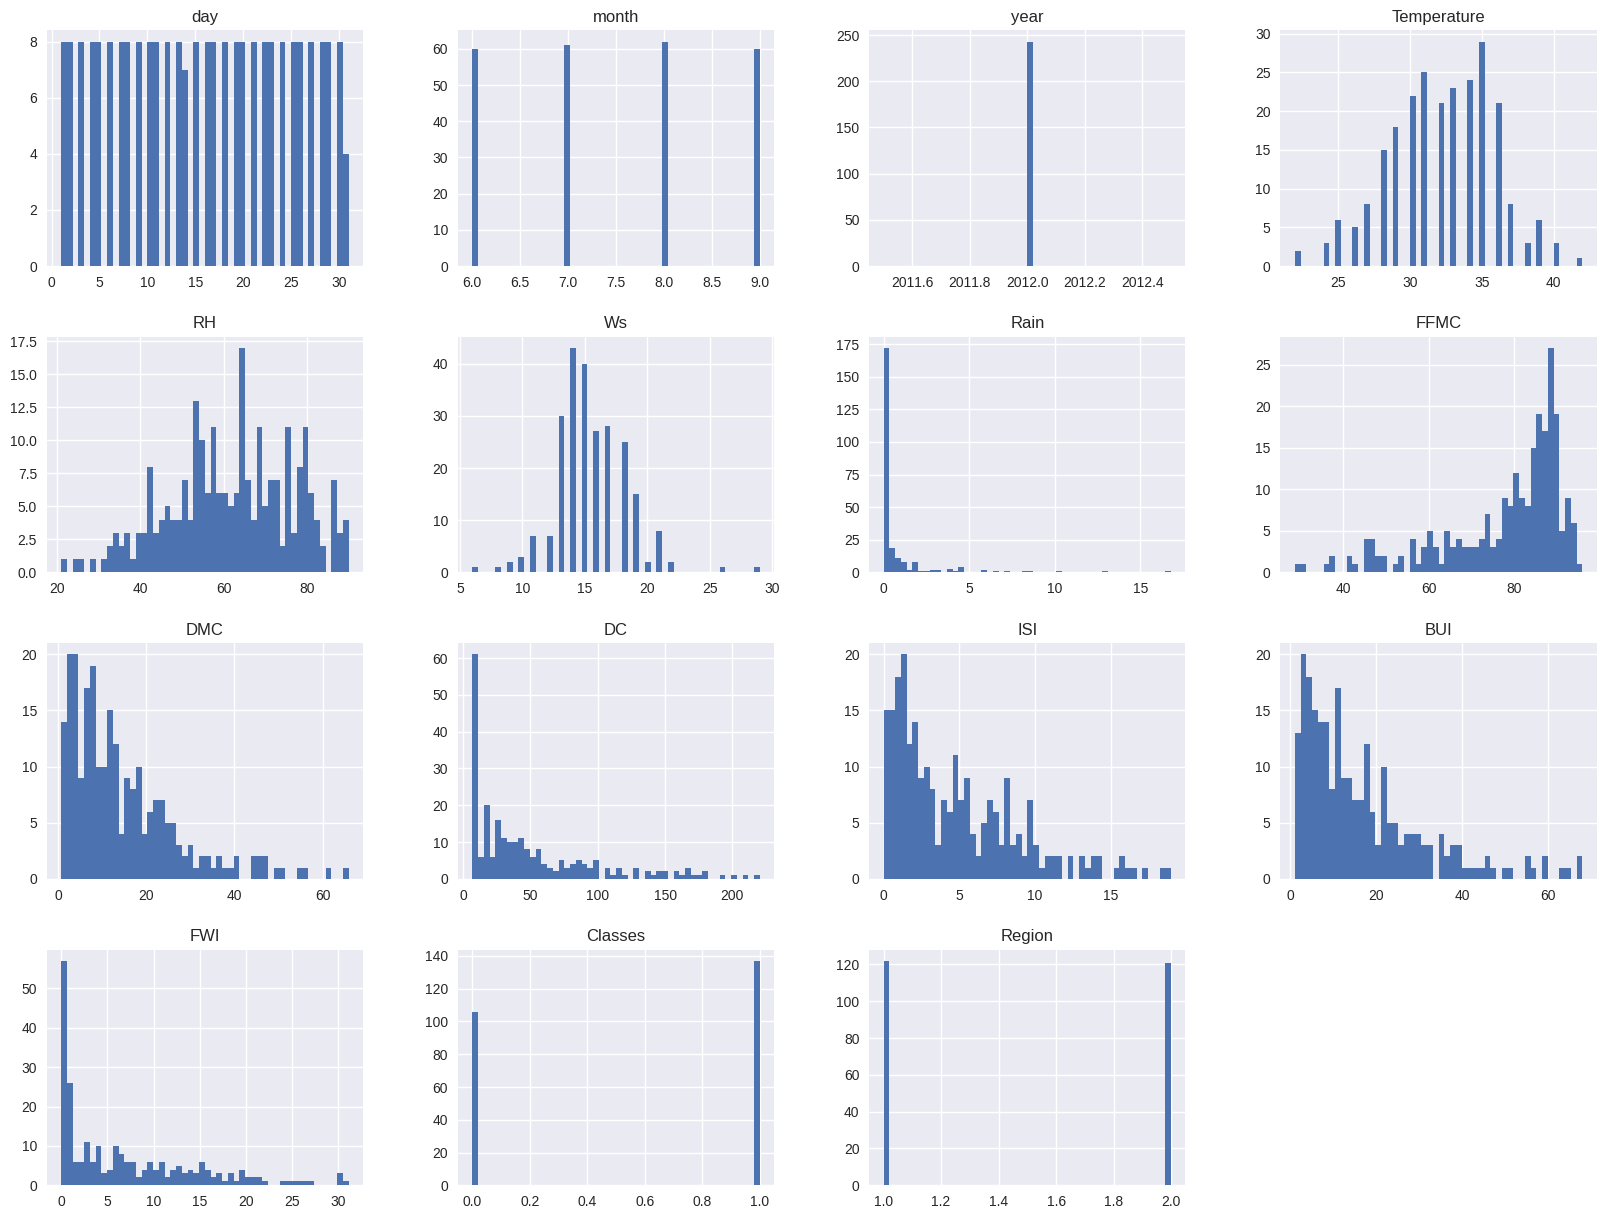

In [ ]:
# lete visualize the distribution
plt.style.use('seaborn')
fires_data.hist(bins=50, figsize=(20,15))
plt.show()

Insights -

1. From the distribution, we should remove day, month and year columns

2. Rest all the other numerical features are skewed in nature

In [ ]:
fires_data1 = fires_data.drop(['day', 'month', 'year'], axis=1)

In [ ]:
# lets check for correlation
fires_data1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

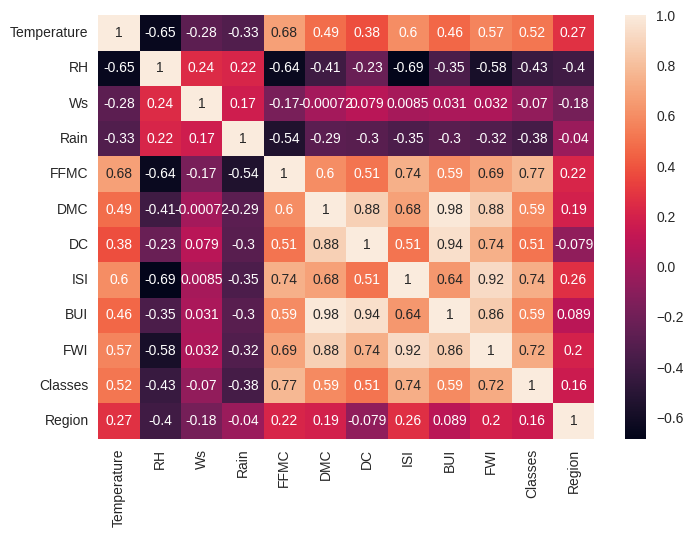

In [ ]:
sns.heatmap(fires_data1.corr(), annot=True)

Looking at the FWI column - We can use this column for regression

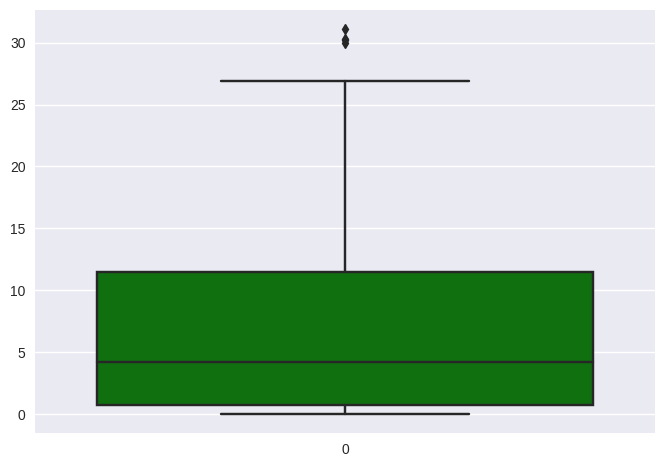

In [ ]:
#Boxplot
ax = sns.boxplot(fires_data['FWI'], color= 'green')

**Fire Analysis**

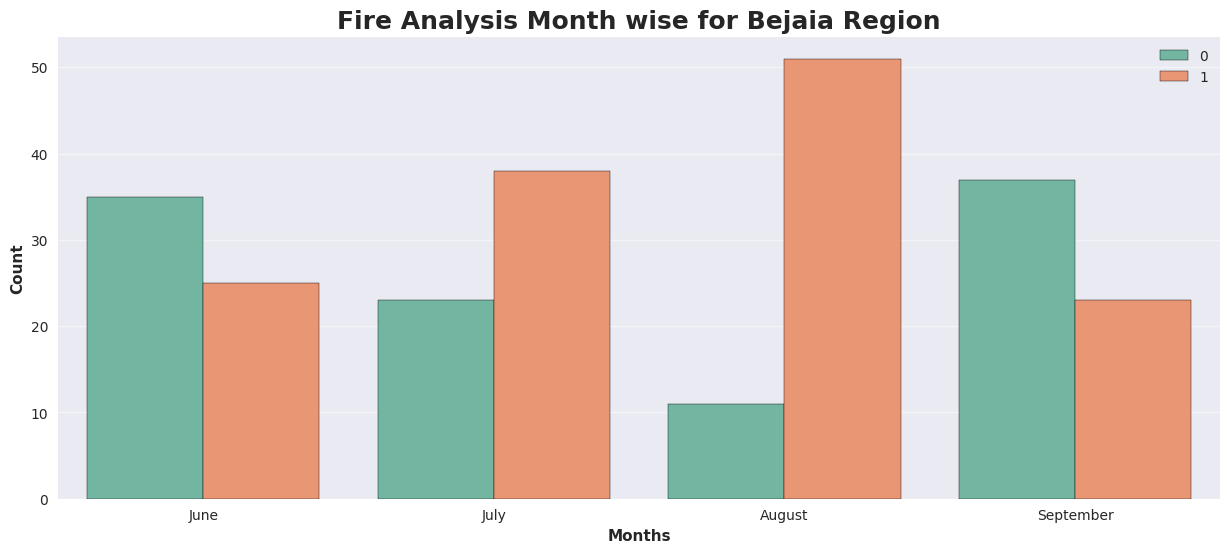

In [ ]:
# Lets first look into the Bejaia Region
dftemp= fires_data.loc[fires_data['Region']== 1]
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= fires_data,ec = 'black', palette= 'Set2')

plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')

plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

For Sidi-Bel Abbes Region

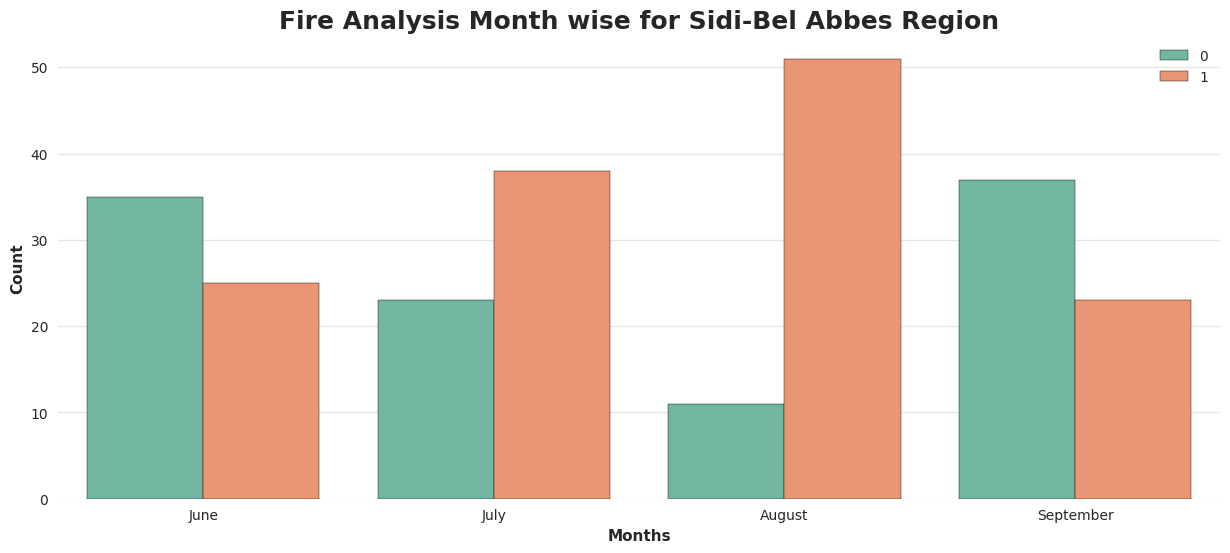

In [ ]:
# Lets first look into the Bejaia Region, we know 0
dftemp2= fires_data.loc[fires_data['Region']== 2]
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= fires_data,ec = 'black', palette= 'Set2')

plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')

plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

Insights -

1. We can observe that August and September had the most number of forest fires for both regions (not fire and 1 is fire).

2. Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

3. There are lesser Fires was on September

**Lets look at some other columns now**

In [ ]:
fires_data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
def barchart(feature,xlabel):
    plt.figure(figsize=[10,6])
    by_feature =  fires_data.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

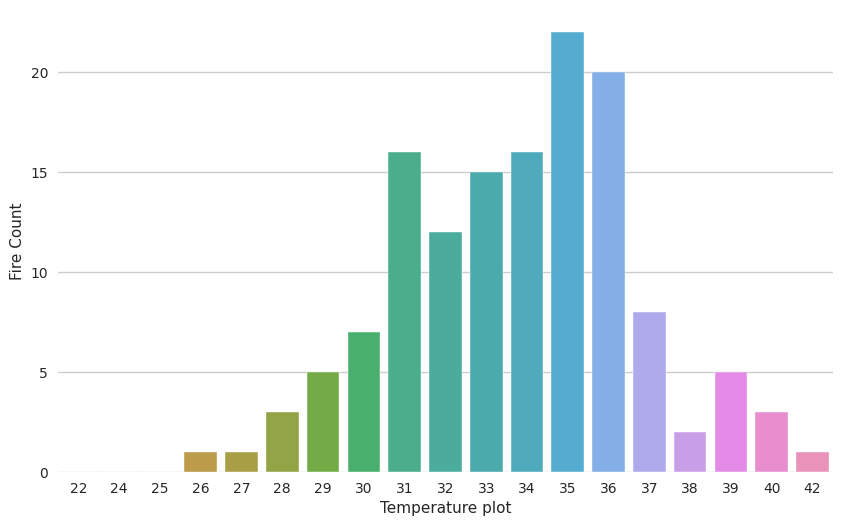

In [ ]:
barchart('Temperature', "Temperature plot")

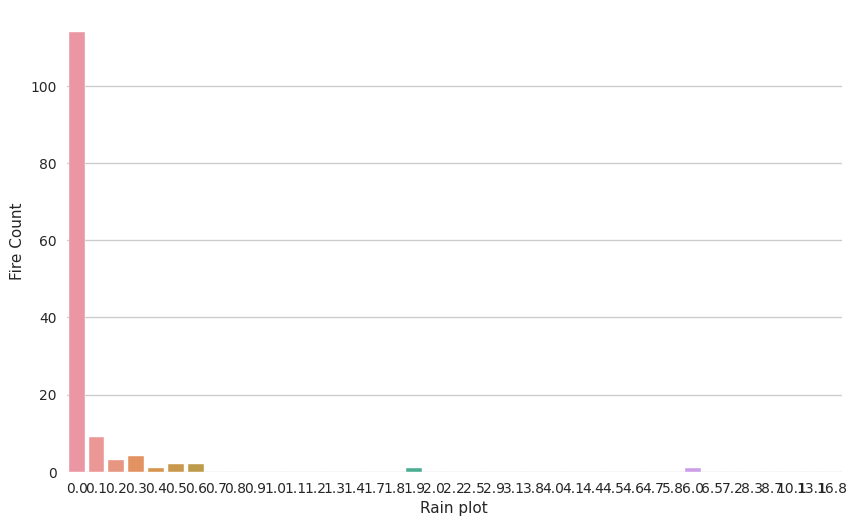

In [ ]:
barchart('Rain', "Rain plot")

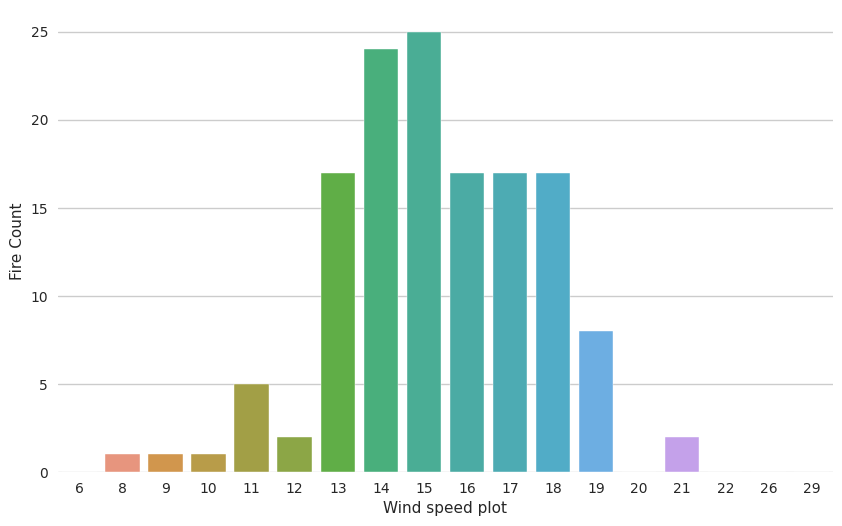

In [ ]:
barchart('Ws', 'Wind speed plot')

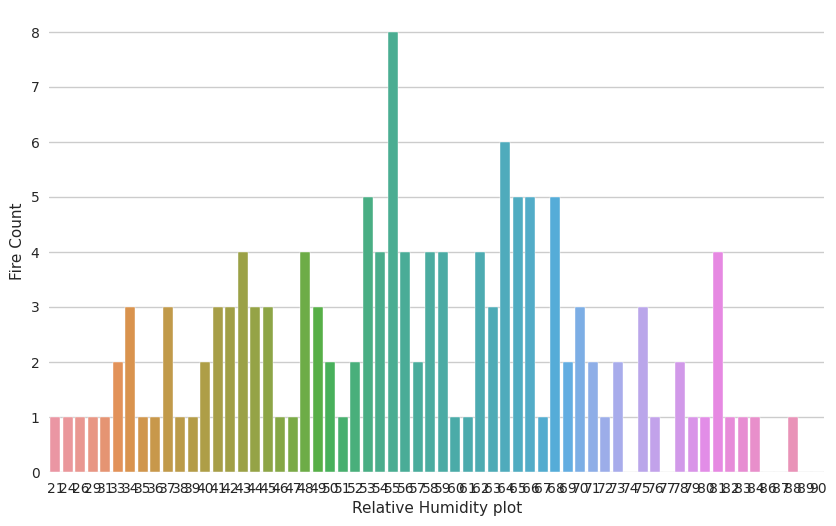

In [ ]:
barchart('RH', "Relative Humidity plot")

Insights -

1. **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
2.  **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
3. **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
4. **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**